<a href="https://colab.research.google.com/github/singhawat29/SCIP513_Deep_Learning/blob/master/HW2_6537710.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import time

#ข้อ1

##ข้อ1.4

In [3]:
x = np.linspace(0, 1, 20)

In [4]:
y = np.cos(2*np.pi*x)*np.exp(-x)

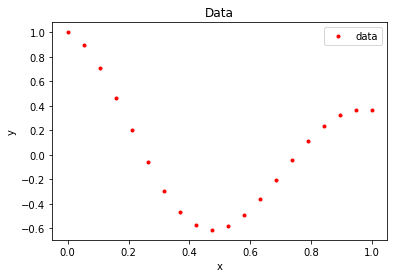

In [11]:
plt.plot(x,y,'.r',label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.legend(loc='upper right')

##ข้อ1.5

In [12]:
def sig(x):
 return 1/(1 + np.exp(-x))
def dsig(x):
 return sig(x)*(1-sig(x))

In [13]:
#g
#n is number data, x and y = data , m = w,b,v
def grad(m,x,y,n):
  w = m[0]
  b = m[1]
  v = m[2]
  alpha = w*x+b
  lamda = v*sig(alpha)-y
  dLbydw = (2/n)* (sum(lamda*v*dsig(alpha)*x))
  dLbydb = (2/n)* (sum(lamda*v*dsig(alpha)))
  dLbydv = (2/n)* (sum(lamda*sig(alpha)))
  return np.array([dLbydw,dLbydb,dLbydv])

In [14]:
# loss function
def loss(m,x,y,n):
  w = m[0]
  b = m[1]
  v = m[2]
  alpha = w*x+b
  e = abs( v*sig(alpha)-y)
  return (1/n)*np.sum(e*e)

In [16]:
m0 = np.random.randn(3)
n = len(x)
g = grad(m0,x,y,n)
l = loss(m0,x,y,n)
print(g)
l

[0.08544343 0.15466043 1.14434853]


0.7218554313054232

[-0.00251093 -0.04937374  1.88932479]
0.2749777130187718
0.25859633363391044
0.25024248929140475
0.24530899852919938
0.242128978486527
0.2399546215066816
0.2384026411338835
0.23725767196056322
0.2363902327757241
0.23571832346259167
0.23518782838913915
0.23476181888621067
0.23441438752945198
0.23412693160562018
0.23388582705027688
0.2336809252676722
0.23350455454273047
0.23335084053197885
0.23321523402298538
0.23309417656277637
0.2329848597448932
0.23288504933106113
0.23279295502030434
0.23270713285161523
0.23262641126214811
0.23254983451064648
0.2324766189962003
0.23240611925458743
0.23233780128806703
0.23227122150205648
0.23220600996400187
0.2321418570195024
0.23207850253456402
0.2320157272054901
0.23195334550656221
0.231891199942325
0.23182915634451776
0.23176710000957185
0.2317049325155397
0.23164256909053968
0.23157993643065933
0.23151697088550327
0.23145361694550998
0.23138982597776844
0.23132555516709746
0.2312607666271562
0.23119542665278395
0.2311295050899411
0.2310629748038128

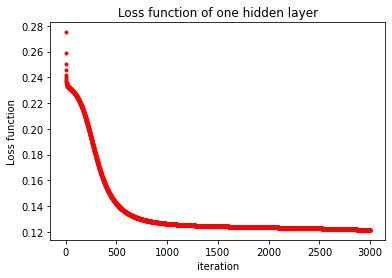

m= [-11.6945178    0.13339698   2.12911194]


In [38]:
m0 = np.random.randn(3)
n = len(x)
s = 1
print(m0)
for i in range(3000):
    g = grad(m0,x,y,n)
    m = m0 - s*g
    print(loss(m,x,y,n))
    #print(m)
    m0 = m
    plt.plot(i,loss(m,x,y,n),'.r')
plt.title('Loss function of one hidden layer')
plt.xlabel("iteration")
plt.ylabel("Loss function")
#plt.legend(loc='upper right')
plt.show()
print("m=",m)

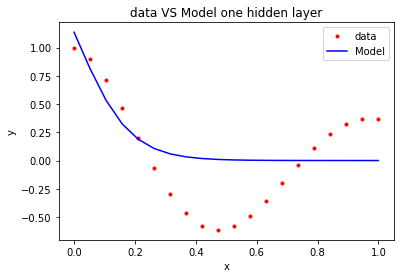

In [39]:
w = m[0]
b = m[1]
v = m[2]
y1 = v*sig(w*x+b)
plt.plot(x,y,'.r',  label="data")
plt.plot(x,y1,'b-',  label="Model")
plt.title('data VS Model one hidden layer')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.show()

##tensorflow

Epoch 1/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.9957
Epoch 2/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.7440
Epoch 3/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.5893
Epoch 4/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4886
Epoch 5/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.4203
Epoch 6/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3722
Epoch 7/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3382
Epoch 8/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.3141
Epoch 9/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2965
Epoch 10/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2833
Epoch 11/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2734
Epoch 12/1000
20/20 [==============================] - 0s 2ms/step - loss: 0.2657
Epoch 13/1000
20/20 [====

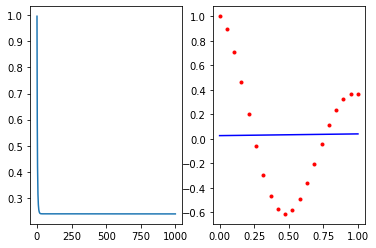

In [ ]:
from tensorflow.keras import Sequential, layers
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(1, use_bias=False))
model.compile(loss='mse', optimizer='sgd')
h = model.fit(x,y,epochs=1000,batch_size=1)
model.summary()
plt.subplot(121)
plt.plot(h.epoch,h.history['loss'])
yp = model(x)
plt.subplot(122)
plt.plot(x,yp,'-b',x,y,'.r')

#ข้อ2

##2.4

In [103]:
#g
#n is number data, x and y = data , m = w,b,v
def grad(m,x,y,n):
  w1 = m[0]
  b1 = m[1]
  v1 = m[2]
  w2 = m[3]
  b2 = m[4]
  v2 = m[5]
  alpha = w1*x+b1
  gamma = w2*x+b2
  lamda = v1*sig(alpha)+v2*sig(gamma)-y
  dLbydw1 = (2/n)* (sum(lamda*v1*dsig(alpha)*x))
  dLbydb1 = (2/n)* (sum(lamda*v1*dsig(alpha)))
  dLbydv1 = (2/n)* (sum(lamda*sig(alpha)))
  dLbydw2 = (2/n)* (sum(lamda*v2*dsig(gamma)*x))
  dLbydb2 = (2/n)* (sum(lamda*v2*dsig(gamma)))
  dLbydv2 = (2/n)* (sum(lamda*sig(gamma)))
  return np.array([dLbydw1,dLbydb1,dLbydv1,dLbydw2,dLbydb2,dLbydv2])

In [104]:
# loss function
def loss(m,x,y,n):
 w1 = m[0]
 b1 = m[1]
 v1 = m[2]
 w2 = m[3]
 b2 = m[4]
 v2 = m[5]
 alpha = w*x+b
 gamma = w2*x+b2
 e = abs( v1*sig(alpha)+v2*sig(gamma)-y)
 return (1/n)*np.sum(e*e)

In [ ]:
m0 = np.random.randn(6)
n = len(x)
g = grad(m0,x,y,n)
l = loss(m0,x,y,n)
print(g)
l

[0.05001692 0.07677042 0.09629802 0.00471386 0.00761102 0.17858718]


0.457329747312992

[ 0.98662095 -0.43908784  0.75873588 -0.30458889  0.61286962 -0.87974621]
0.35762561630852935
0.3331120993919582
0.3240648214499532
0.3190160065783567
0.31512725717035495
0.31165383256253537
0.30839238090221305
0.30528317120167875
0.3023052984868745
0.29944865891033906
0.29670636138502765
0.29407264083836265
0.29154226766544583
0.2891103686363829
0.2867723627687229
0.28452393035649726
0.28236099232698125
0.2802796934412511
0.27827638742686067
0.2763476234255249
0.27449013351296986
0.2727008211614817
0.270976750554072
0.26931513667543233
0.2677133361141657
0.2661688385175888
0.26467925864605013
0.26324232897863603
0.26185589282652216
0.26051789791415175
0.2592263903919547
0.25797950924749524
0.256775481084807
0.25561261524425954
0.2544892992376451
0.25340399447529094
0.2523552322639277
0.25134161005578615
0.25036178793097924
0.24941448529667026
0.24849847778783515
0.24761259435562835
0.24675571453045025
0.24592676584780782
0.24512472142597796
0.24434859768530803
0.24359745219975865
0.24

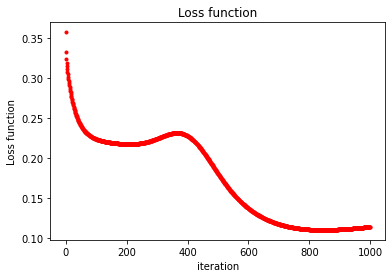

m= [-5.60778676 -0.6813646   3.03812274  0.66814038  0.85462028 -0.23710909]


In [69]:
#the batch gradient descent method
m0 = np.random.randn(6)
n = len(x)
s = 0.5
print(m0)
for i in range(1000):
    g = grad(m0,x,y,n)
    m = m0 - s*g
    print(loss(m,x,y,n))
    #print(m)
    m0 = m
    plt.plot(i,loss(m,x,y,n),'.r')
plt.title('Loss function')
plt.xlabel("iteration")
plt.ylabel("Loss function")
plt.show()
print("m=",m)

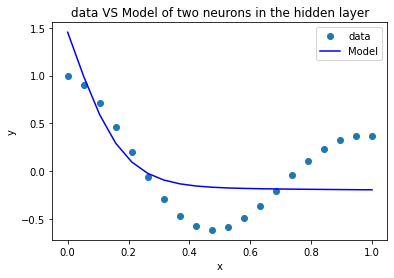

In [71]:
w1 = m[0]
b1 = m[1]
v1 = m[2]
w2 = m[3]
b2 = m[4]
v2 = m[5]
alpha = w*x+b
gamma = w2*x+b2
y1 = v1*sig(alpha)+v2*sig(gamma)
plt.plot(x,y,'o',  label="data")
plt.plot(x,y1,'b-',  label="Model")
plt.title('data VS Model of two neurons in the hidden layer')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.show()

[-1.08097941  0.20608981 -0.09439871 -0.59966059 -1.02212307  0.19284708]
epoch= 0
l epoch = 0.2418139977181165
epoch= 1
l epoch = 0.2396912316502645
epoch= 2
l epoch = 0.23833657392174887
epoch= 3
l epoch = 0.23744968587063664
epoch= 4
l epoch = 0.23685056999748527
epoch= 5
l epoch = 0.23642983806464024
epoch= 6
l epoch = 0.2361203590230046
epoch= 7
l epoch = 0.23588064117610866
epoch= 8
l epoch = 0.2356849003442786
epoch= 9
l epoch = 0.23551704260436376
epoch= 10
l epoch = 0.23536698352480065
epoch= 11
l epoch = 0.23522838095512244
epoch= 12
l epoch = 0.23509723121005477
epoch= 13
l epoch = 0.23497099627404894
epoch= 14
l epoch = 0.23484805930723215
epoch= 15
l epoch = 0.23472738395603596
epoch= 16
l epoch = 0.23460830061266688
epoch= 17
l epoch = 0.2344903719832963
epoch= 18
l epoch = 0.23437330833445685
epoch= 19
l epoch = 0.2342569139343445
epoch= 20
l epoch = 0.23414105312876088
epoch= 21
l epoch = 0.23402562880360656
epoch= 22
l epoch = 0.23391056867887575
epoch= 23
l epoch = 0.

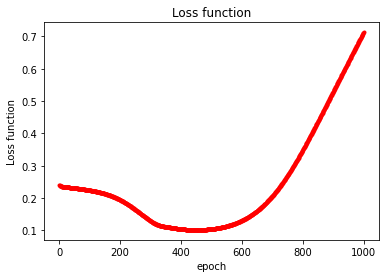

m= [-8.60409749  1.4687094   4.19987711 -5.20007761  1.35447149 -2.90951331]


In [111]:
#the stochastic gradient descent method
m0 = np.random.randn(6)
s = 1
batch_size = 1
n_data_set = n
itereation = int(n_data_set/batch_size)
print(m0)
f = 0
epoch = 1000
for ii in range(epoch+1):
  print("epoch=",ii)
  #print("m0 epoch =",m0)
  f = 0
  for i in range(itereation):
      e = f + batch_size
      g = grad(m0,x[f:e],y[f:e],n)
      m = m0 - s*g
      m0 = m
      f = f + batch_size
  print("l epoch =",loss(m,x,y,n))
  plt.plot(ii,loss(m,x,y,n),'.r')

plt.title('Loss function')
plt.xlabel("epoch")
plt.ylabel("Loss function")
plt.show()
print("m=",m)

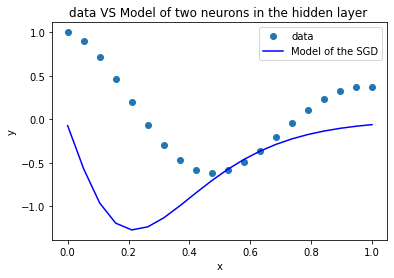

In [115]:
w1 = m[0]
b1 = m[1]
v1 = m[2]
w2 = m[3]
b2 = m[4]
v2 = m[5]
alpha = w*x+b
gamma = w2*x+b2
y1 = v1*sig(alpha)+v2*sig(gamma)
plt.plot(x,y,'o',  label="data")
plt.plot(x,y1,'b-',  label="Model of the SGD")
plt.title('data VS Model of two neurons in the hidden layer ')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.show()

##tensorflow

Epoch 1/100
20/20 [==============================] - 1s 33ms/step - loss: 0.3200
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2909
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2708
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.2574
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2481
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2418
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2373
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2343
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2322
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2307
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2296
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2288
Epoch 13/100
20/20 [================

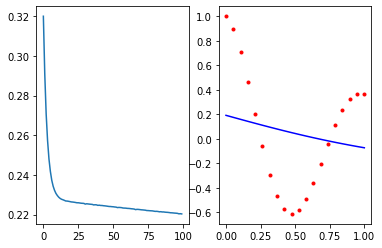

In [ ]:
from tensorflow.keras import Sequential, layers
model = Sequential()
model.add(layers.Input(shape=(1,)))
model.add(layers.Dense(2, activation='sigmoid'))
model.add(layers.Dense(1, use_bias=False))
model.compile(loss='mse', optimizer='sgd')
h = model.fit(x,y,epochs=100,batch_size=1)
model.summary()
plt.subplot(121)
plt.plot(h.epoch,h.history['loss'])
yp = model(x)
plt.subplot(122)
plt.plot(x,yp,'-b',x,y,'.r')

#ข้อ3

##ข้อ3.4

In [72]:
#g
#n is number data, x and y = data , m = w,b,v
def grad(m,x,y,n):
  w1 = m[0]
  b1 = m[1]
  w2 = m[2]
  b2 = m[3]
  v = m[4]
  alpha = w1*x+b1
  h1 = sig(alpha)
  gamma = w2*h1+b2
  h2 = sig(gamma)
  lamda = v*h2-y
  dLbydw1 = (2/n)* (sum(lamda*v*dsig(gamma)*w2*dsig(alpha)*x))
  dLbydb1 = (2/n)* (sum(lamda*v*dsig(gamma)*w2*dsig(alpha)))
  dLbydw2 = (2/n)* (sum(lamda*v*dsig(gamma)*h1))
  dLbydb2 = (2/n)* (sum(lamda*v*dsig(gamma)))
  dLbydv = (2/n)* (sum(lamda*h2))
  return np.array([dLbydw1,dLbydb1,dLbydw2,dLbydb2,dLbydv])

In [73]:
# loss function
def loss(m,x,y,n):
 w1 = m[0]
 b1 = m[1]
 w2 = m[2]
 b2 = m[3]
 v = m[4]
 alpha = w1*x+b1
 h1 = sig(alpha)
 gamma = w2*h1+b2
 h2 = sig(gamma)
 e = abs( v*h2-y)
 return (1/n)*np.sum(e*e)

In [ ]:
m0 = np.random.randn(5)
n = len(x)
g = grad(m0,x,y,n)
l = loss(m0,x,y,n)
print(g)
l

[-0.01027313 -0.01966059  0.46629101  0.70588958  1.23173829]


1.1657575769967243

[ 1.20234351 -0.64374332 -2.95080053 -2.125383   -0.59040862]
0.24253759030335723
0.2424816895107411
0.24242694549267202
0.24237331808473025
0.24232076894248722
0.24226926143790078
0.24221876056275643
0.2421692328385989
0.24212064623264695
0.2420729700792321
0.24202617500633666
0.24198023286685097
0.24193511667419276
0.24189080054197315
0.24184725962740716
0.24180447007820485
0.24176240898269025
0.2417210543229218
0.24168038493060415
0.241640380445598
0.2416010212768502
0.24156228856557938
0.24152416415056666
0.2414866305354104
0.24144967085761648
0.241413268859404
0.24137740886011577
0.2413420757301311
0.24130725486618518
0.24127293216800738
0.24123909401619567
0.24120572725125244
0.24117281915370825
0.24114035742527068
0.2411083301709343
0.2410767258819961
0.24104553341992208
0.24101474200101602
0.24098434118184386
0.2409543208453688
0.2409246711877597
0.24089538270583116
0.24086644618508304
0.24083785268830354
0.24080959354470696
0.2407816603395752
0.24075404490437707
0.240726739307

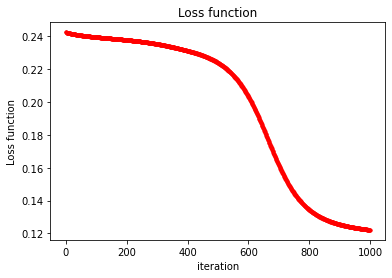

m= [ 6.60501206 -1.56475606 -6.9178067   0.46541888  3.30871993]


In [94]:
m0 = np.random.randn(5)
s = 1
print(m0)
for i in range(1000):
    g = grad(m0,x,y,n)
    m = m0 - s*g
    print(loss(m,x,y,n))
    #print(m)
    m0 = m
    plt.plot(i,loss(m,x,y,n),'.r')
plt.title('Loss function')
plt.xlabel("iteration")
plt.ylabel("Loss function")
plt.show()
print("m=",m)

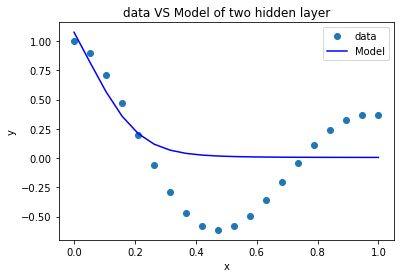

In [97]:
w1 = m[0]
b1 = m[1]
w2 = m[2]
b2 = m[3]
v = m[4]
alpha = w1*x+b1
h1 = sig(alpha)
gamma = w2*h1+b2
h2 = sig(gamma)
y1 = v*h2
plt.plot(x,y,'o',  label="data")
plt.plot(x,y1,'b-',  label="Model")
plt.title('data VS Model of two hidden layer')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='upper right')
plt.show()

[-0.10999527 -0.86489936 -1.66575711  0.52703708  0.61053355]
epoch= 0
l epoch = 0.24180893790132174
epoch= 1
l epoch = 0.23846498445341965
epoch= 2
l epoch = 0.2378485365707119
epoch= 3
l epoch = 0.23757613166952912
epoch= 4
l epoch = 0.2374139907892365
epoch= 5
l epoch = 0.23730212275090767
epoch= 6
l epoch = 0.23721766345279427
epoch= 7
l epoch = 0.2371498544298873
epoch= 8
l epoch = 0.23709292490490413
epoch= 9
l epoch = 0.23704348701158776
epoch= 10
l epoch = 0.23699941459924295
epoch= 11
l epoch = 0.236959302476753
epoch= 12
l epoch = 0.23692218253177014
epoch= 13
l epoch = 0.2368873645242976
epoch= 14
l epoch = 0.2368543419193142
epoch= 15
l epoch = 0.2368227336844913
epoch= 16
l epoch = 0.236792246958915
epoch= 17
l epoch = 0.2367626523370556
epoch= 18
l epoch = 0.2367337670489068
epoch= 19
l epoch = 0.2367054432346869
epoch= 20
l epoch = 0.23667755959516212
epoch= 21
l epoch = 0.23665001533192995
epoch= 22
l epoch = 0.2366227256741493
epoch= 23
l epoch = 0.23659561852524635
ep

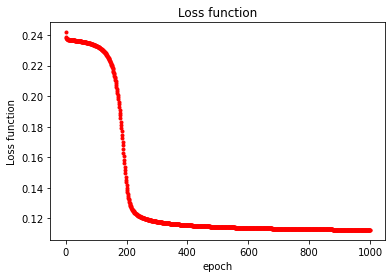

m= [10.50539254 -3.23826124 -9.94552997  0.18539922  2.29253575]


In [100]:
#mini
m0 = np.random.randn(5)
s = 5
batch_size = 5
n_data_set = n
itereation = int(n_data_set/batch_size)
print(m0)
f = 0
epoch = 1000
for ii in range(epoch+1):
  print("epoch=",ii)
  #print("m0 epoch =",m0)
  f = 0
  for i in range(itereation):
      e = f + batch_size
      g = grad(m0,x[f:e],y[f:e],n)
      m = m0 - s*g
      #print(loss(m,x,y,n))
      #print(m)
      m0 = m
      f = f + batch_size
      #print(m0)
      #plt.plot(i,loss(m,x,y,n),'.r')
  print("l epoch =",loss(m,x,y,n))
  plt.plot(ii,loss(m,x,y,n),'.r')

plt.title('Loss function')
plt.xlabel("epoch")
plt.ylabel("Loss function")
plt.show()
print("m=",m)

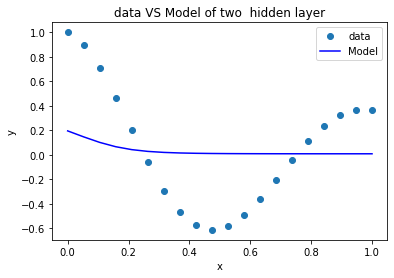

In [117]:
w1 = m[0]
b1 = m[1]
w2 = m[2]
b2 = m[3]
v = m[4]
alpha = w1*x+b1
h1 = sig(alpha)
gamma = w2*h1+b2
h2 = sig(gamma)
y1 = v*h2
plt.plot(x,y,'o',  label="data")
plt.plot(x,y1,'b-',  label="Model")
plt.title('data VS Model of two  hidden layer')
plt.legend(loc='upper right')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

##tensorflow

Epoch 1/1000
4/4 [==============================] - 1s 3ms/step - loss: 0.2434
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2430
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2428
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2428
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.2423
Epoch 6/1000
4/4 [==============================] - 0s 7ms/step - loss: 0.2421
Epoch 7/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2417
Epoch 8/1000
4/4 [==============================] - 0s 6ms/step - loss: 0.2415
Epoch 9/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.2415
Epoch 10/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2412
Epoch 11/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2409
Epoch 12/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.2414
Epoch 13/1000
4/4 [==============================

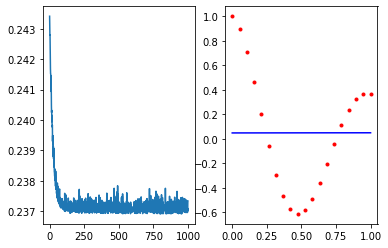

In [ ]:
from tensorflow.keras import Sequential, layers
model3 = Sequential()
model3.add(layers.Input(shape=(1,)))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.add(layers.Dense(1, activation='sigmoid'))
model3.add(layers.Dense(1, use_bias=False))
model3.compile(loss='mse', optimizer='sgd')
h3 = model3.fit(x,y,epochs=1000,batch_size=5)
model3.summary()
plt.subplot(121)
plt.plot(h3.epoch,h3.history['loss'])
yp = model3(x)
plt.subplot(122)
plt.plot(x,yp,'-b',x,y,'.r')

#extra

Epoch 1/500
4/4 [==============================] - 1s 4ms/step - loss: 0.7630
Epoch 2/500
4/4 [==============================] - 0s 4ms/step - loss: 0.6232
Epoch 3/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5028
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 0.4038
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 0.3509
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2987
Epoch 7/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2792
Epoch 8/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2612
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2554
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2579
Epoch 11/500
4/4 [==============================] - 0s 5ms/step - loss: 0.2590
Epoch 12/500
4/4 [==============================] - 0s 4ms/step - loss: 0.2554
Epoch 13/500
4/4 [==============================] - 0s 4ms/st

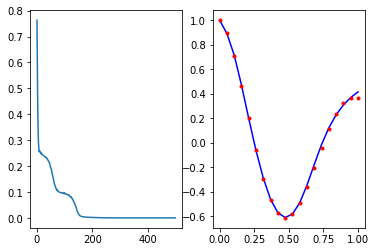

In [ ]:
from tensorflow.keras import Sequential, layers
model3 = Sequential()
model3.add(layers.Input(shape=(1,)))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(10, activation='tanh'))
model3.add(layers.Dense(1, use_bias=False))
model3.compile(loss='mse', optimizer='adam')
h3 = model3.fit(x,y,epochs=500,batch_size=5)
model3.summary()
plt.subplot(121)
plt.plot(h3.epoch,h3.history['loss'])
yp = model3(x)
plt.subplot(122)
plt.plot(x,yp,'-b',x,y,'.r')